# NETFLIX - KAGGLE
### Participantes: 
- Paulo  Lopes - RM:551137
- Gustavo Melo - RM:98809
- Carlos Ganzerli - RM: 98840

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [5]:
df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# 1 - Qual a tendência de lançamentos de filmes de terror ao longo dos anos? 

Este código filtra os filmes de terror do conjunto de dados,  conta quantos foram lançados a cada ano e plota um gráfico de linha para visualizar a tendência ao longo do tempo.

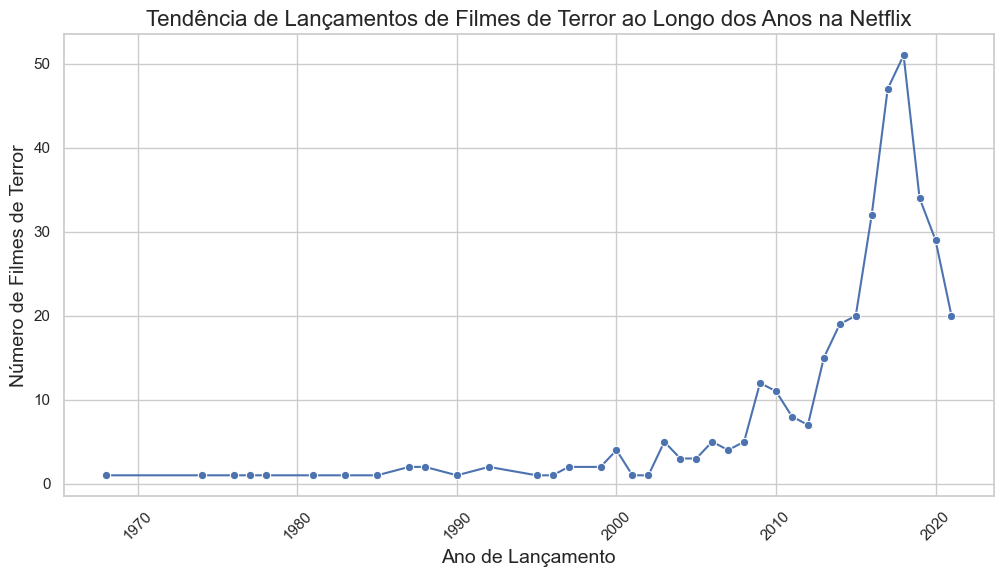

In [7]:
horror_df = df[df['listed_in'].str.contains('Horror Movies', na=False)]
horror_by_year = horror_df.groupby('release_year').size().reset_index(name='count')
horror_by_year = horror_by_year.sort_values('release_year')

sns.set(style='whitegrid')
plt.figure(figsize=(12,6))
sns.lineplot(data=horror_by_year, x='release_year', y='count', marker='o')

plt.title('Tendência de Lançamentos de Filmes de Terror ao Longo dos Anos na Netflix', fontsize=16)
plt.xlabel('Ano de Lançamento', fontsize=14)
plt.ylabel('Número de Filmes de Terror', fontsize=14)
plt.xticks(rotation=45)
plt.show()

# 2 - Existe uma correlação entre a duração dos filmes de terror e sua data de lançamento?

Para a questão 2 o código converte a coluna duration para numérica, plota um gráfico de dispersão (scatter plot) e ajusta uma linha de regressão para analisar a relação entre o ano de lançamento e a duração dos filmes de terror.

C:\Users\Usuario\AppData\Local\Temp\ipykernel_16940\1363719038.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  horror_df['duration'] = horror_df['duration'].str.replace(' min', '').astype(float)


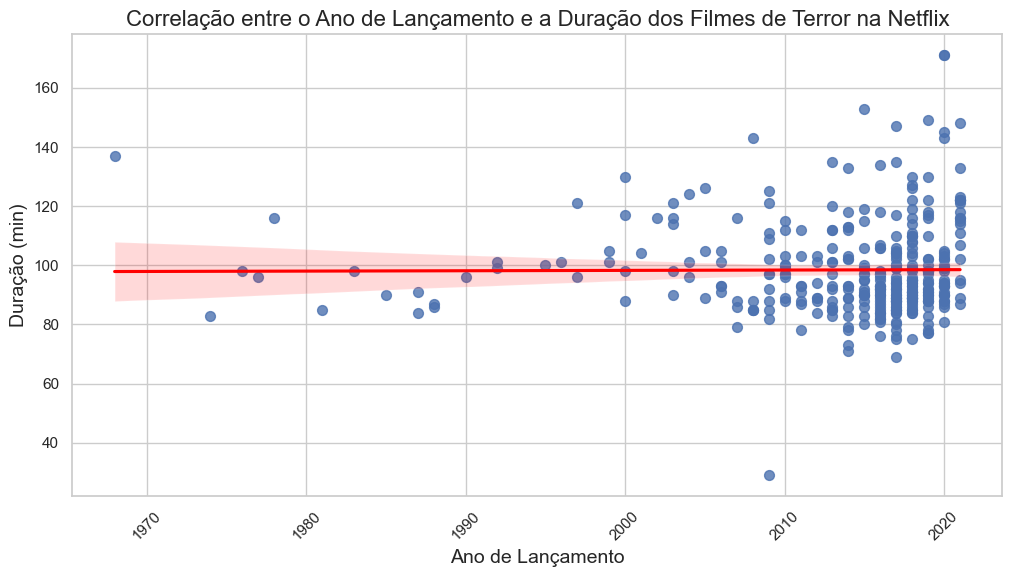

In [8]:
horror_df = df[(df['listed_in'].str.contains('Horror Movies', na=False)) & (df['type'] == 'Movie')]
horror_df['duration'] = horror_df['duration'].str.replace(' min', '').astype(float)
horror_df = horror_df.dropna(subset=['duration', 'release_year'])

sns.set(style='whitegrid')
plt.figure(figsize=(12,6))
sns.regplot(data=horror_df, x='release_year', y='duration', scatter_kws={'s': 50}, line_kws={"color":"red"})

plt.title('Correlação entre o Ano de Lançamento e a Duração dos Filmes de Terror na Netflix', fontsize=16)
plt.xlabel('Ano de Lançamento', fontsize=14)
plt.ylabel('Duração (min)', fontsize=14)
plt.xticks(rotation=45)
plt.show()

# 3 - Como a popularidade de diferentes categorias de filmes de terror evoluiu ao longo do tempo?
Este código analisa a evolução dos principais subgêneros de filmes de terror ao longo dos anos. Ele filtra os filmes de terror, identifica os gêneros, explora como cada subgênero evoluiu ao longo do tempo e plota a tendência dos 5 subgêneros mais frequentes com um gráfico de linhas.

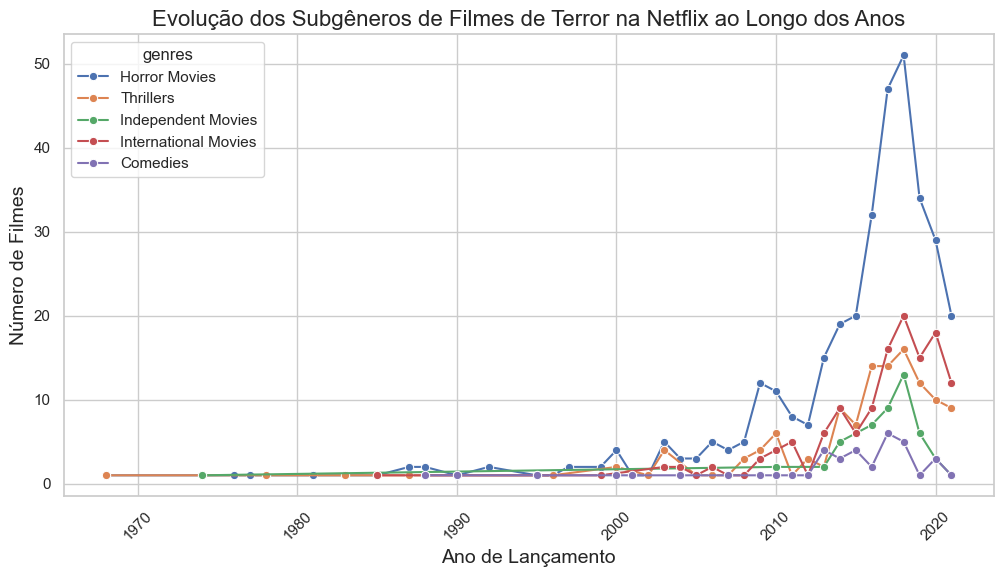

In [9]:
horror_df['genres'] = horror_df['listed_in'].str.split(', ')

horror_by_genre_year = horror_df.explode('genres').groupby(['release_year', 'genres']).size().reset_index(name='count')

top_genres = horror_by_genre_year.groupby('genres')['count'].sum().nlargest(5).index

filtered_horror = horror_by_genre_year[horror_by_genre_year['genres'].isin(top_genres)]

plt.figure(figsize=(12,6))
sns.lineplot(data=filtered_horror, x='release_year', y='count', hue='genres', marker='o')

plt.title('Evolução dos Subgêneros de Filmes de Terror na Netflix ao Longo dos Anos', fontsize=16)
plt.xlabel('Ano de Lançamento', fontsize=14)
plt.ylabel('Número de Filmes', fontsize=14)
plt.xticks(rotation=45)
plt.show()

# 4 - Filmes de terror são mais frequentemente adicionados à Netflix em alguma época específica do ano?

A questão 4 analisa se os filmes de terror são adicionados à Netflix com mais frequência em determinados meses do ano. Ele converte a coluna date_added em formato de data, extrai o mês de adição e agrupa os dados por mês. O gráfico de barras resultante mostra o número de filmes de terror adicionados em cada mês, permitindo identificar padrões sazonais.

C:\Users\Usuario\AppData\Local\Temp\ipykernel_16940\3867499868.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  horror_df['date_added'] = pd.to_datetime(horror_df['date_added'])
C:\Users\Usuario\AppData\Local\Temp\ipykernel_16940\3867499868.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  horror_df['month_added'] = horror_df['date_added'].dt.month_name()
C:\Users\Usuario\AppData\Local\Temp\ipykernel_16940\3867499868.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and wi

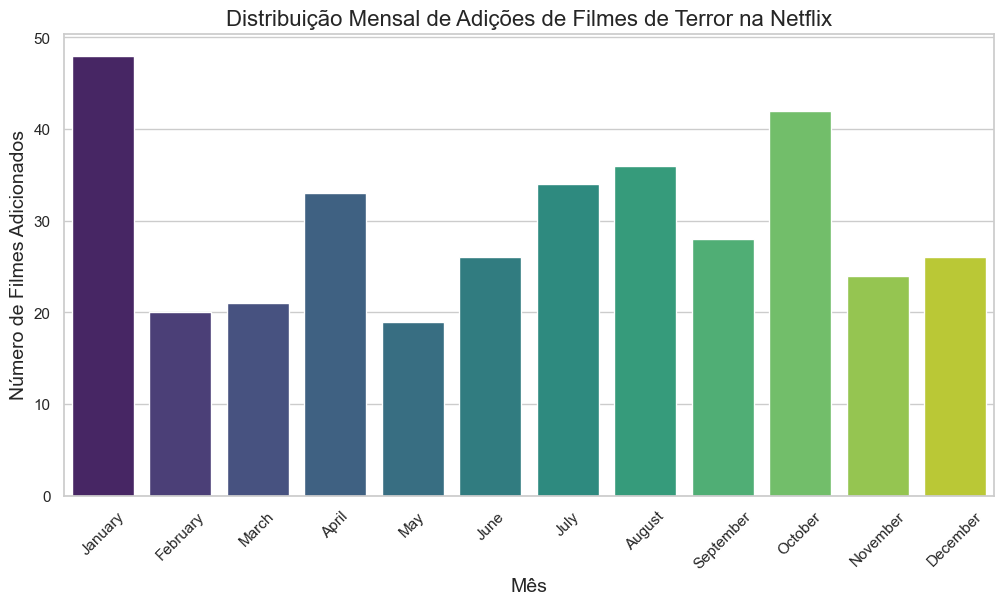

In [10]:
horror_df = df[df['listed_in'].str.contains('Horror Movies', na=False)]

horror_df['date_added'] = pd.to_datetime(horror_df['date_added'])
horror_df['month_added'] = horror_df['date_added'].dt.month_name()

horror_by_month = horror_df.groupby('month_added').size().reindex(
    ['January', 'February', 'March', 'April', 'May', 'June', 
     'July', 'August', 'September', 'October', 'November', 'December']
).reset_index(name='count')

sns.set(style='whitegrid')
plt.figure(figsize=(12,6))
sns.barplot(data=horror_by_month, x='month_added', y='count', palette='viridis')

plt.title('Distribuição Mensal de Adições de Filmes de Terror na Netflix', fontsize=16)
plt.xlabel('Mês', fontsize=14)
plt.ylabel('Número de Filmes Adicionados', fontsize=14)
plt.xticks(rotation=45)
plt.show()

# 5 - Existe uma tendência global de filmes de terror com base no país de origem?

A questão 5 analisa a tendência de lançamentos de filmes de terror na Netflix ao longo dos anos, com base no país de origem. Ele agrupa os dados por ano e país, filtrando os 5 países com mais filmes de terror. O gráfico de linhas resultante exibe como a produção de filmes de terror variou ao longo do tempo para esses países.

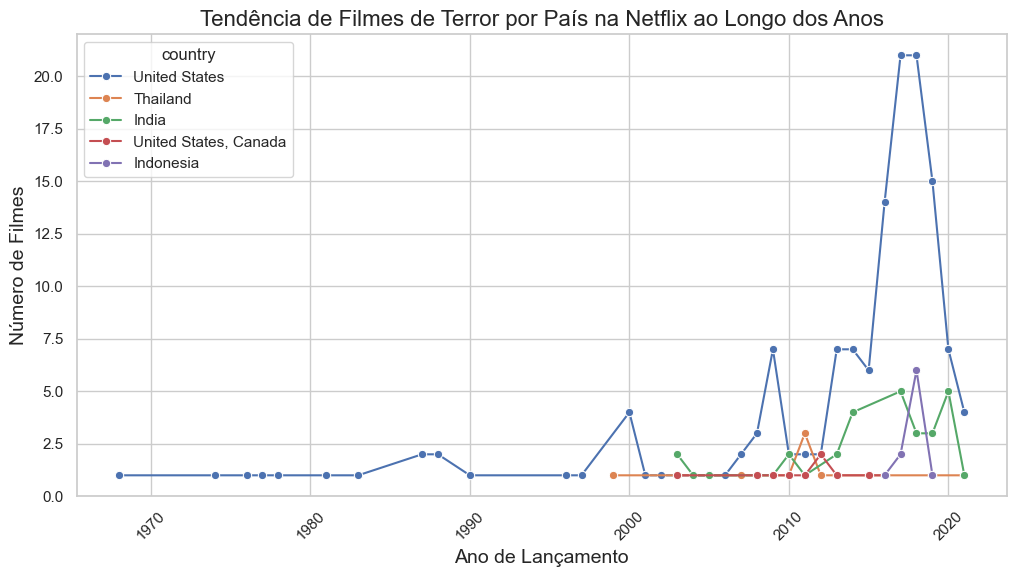

In [11]:
horror_by_country_year = horror_df.dropna(subset=['country']).groupby(['release_year', 'country']).size().reset_index(name='count')

top_countries = horror_by_country_year.groupby('country')['count'].sum().nlargest(5).index

filtered_horror = horror_by_country_year[horror_by_country_year['country'].isin(top_countries)]

sns.set(style='whitegrid')
plt.figure(figsize=(12,6))
sns.lineplot(data=filtered_horror, x='release_year', y='count', hue='country', marker='o')

plt.title('Tendência de Filmes de Terror por País na Netflix ao Longo dos Anos', fontsize=16)
plt.xlabel('Ano de Lançamento', fontsize=14)
plt.ylabel('Número de Filmes', fontsize=14)
plt.xticks(rotation=45)
plt.show()

# 6 - Filmes de terror tendem a ter uma classificação indicativa mais restrita ao longo do tempo?

Este código examina se as classificações indicativas (como PG, R, TV-MA) dos filmes de terror na Netflix mudaram ao longo dos anos. Ele agrupa os filmes por ano e classificação, filtrando as 5 classificações mais frequentes. O gráfico de linhas mostra a evolução de cada classificação ao longo do tempo, revelando se há uma tendência em direção a classificações mais restritas.

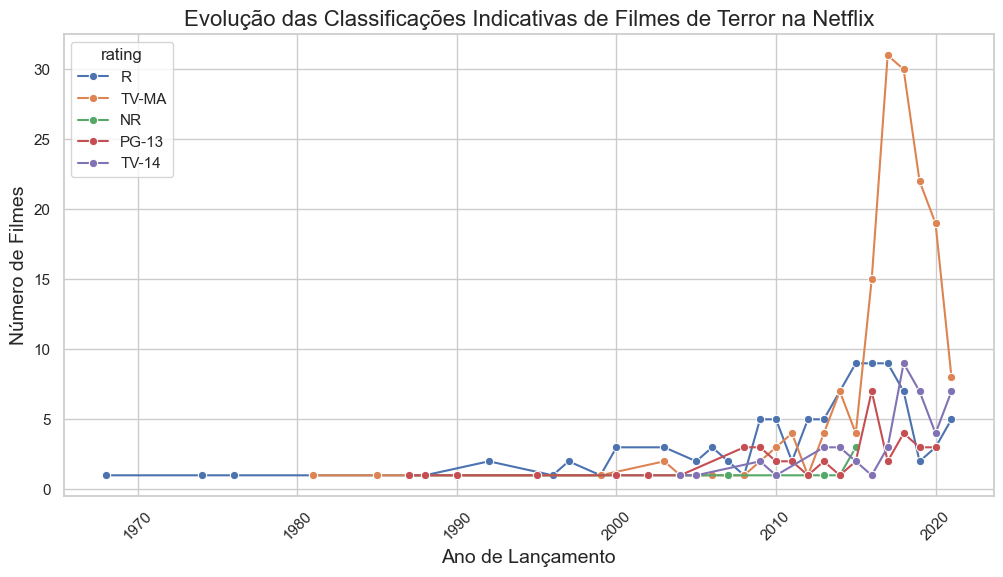

In [12]:
horror_by_rating_year = horror_df.groupby(['release_year', 'rating']).size().reset_index(name='count')
top_ratings = horror_by_rating_year['rating'].value_counts().nlargest(5).index

filtered_horror = horror_by_rating_year[horror_by_rating_year['rating'].isin(top_ratings)]

sns.set(style='whitegrid')
plt.figure(figsize=(12,6))
sns.lineplot(data=filtered_horror, x='release_year', y='count', hue='rating', marker='o')

plt.title('Evolução das Classificações Indicativas de Filmes de Terror na Netflix', fontsize=16)
plt.xlabel('Ano de Lançamento', fontsize=14)
plt.ylabel('Número de Filmes', fontsize=14)
plt.xticks(rotation=45)
plt.show()

# 7 - Há uma relação entre a quantidade de atores (cast) em filme de terror e a duração dos filmes?

Este código explora a relação entre o número de atores e a duração dos filmes de terror. Ele conta o número de atores em cada filme e converte a duração para formato numérico. Em seguida, plota um gráfico de dispersão com uma linha de regressão para visualizar se há uma correlação entre a quantidade de atores e a duração dos filmes.

C:\Users\Usuario\AppData\Local\Temp\ipykernel_16940\3399104358.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  horror_df['duration'] = horror_df['duration'].str.replace(' min', '').astype(float)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_16940\3399104358.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  horror_df['num_cast'] = horror_df['cast'].str.split(',').str.len()


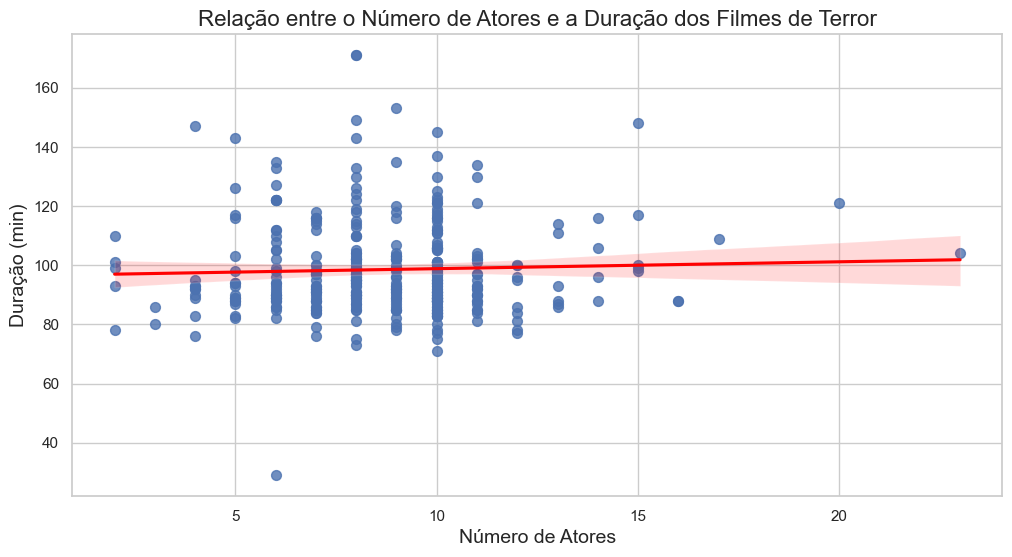

In [13]:
horror_df['duration'] = horror_df['duration'].str.replace(' min', '').astype(float)
horror_df['num_cast'] = horror_df['cast'].str.split(',').str.len()

horror_df = horror_df.dropna(subset=['duration', 'num_cast'])

sns.set(style='whitegrid')
plt.figure(figsize=(12,6))
sns.regplot(data=horror_df, x='num_cast', y='duration', scatter_kws={'s': 50}, line_kws={"color":"red"})

plt.title('Relação entre o Número de Atores e a Duração dos Filmes de Terror', fontsize=16)
plt.xlabel('Número de Atores', fontsize=14)
plt.ylabel('Duração (min)', fontsize=14)
plt.show()

# 8 - Qual a distribuição de filmes de terror por duração?

Para questão 8 examinamos como a duração dos filmes de terror na Netflix está distribuída. O código converte a coluna de duração para um formato numérico e plota um histograma com uma curva de densidade para mostrar a distribuição das durações dos filmes de terror.



C:\Users\Usuario\AppData\Local\Temp\ipykernel_16940\4279687894.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  horror_df['duration'] = horror_df['duration'].str.replace(' min', '').astype(float)


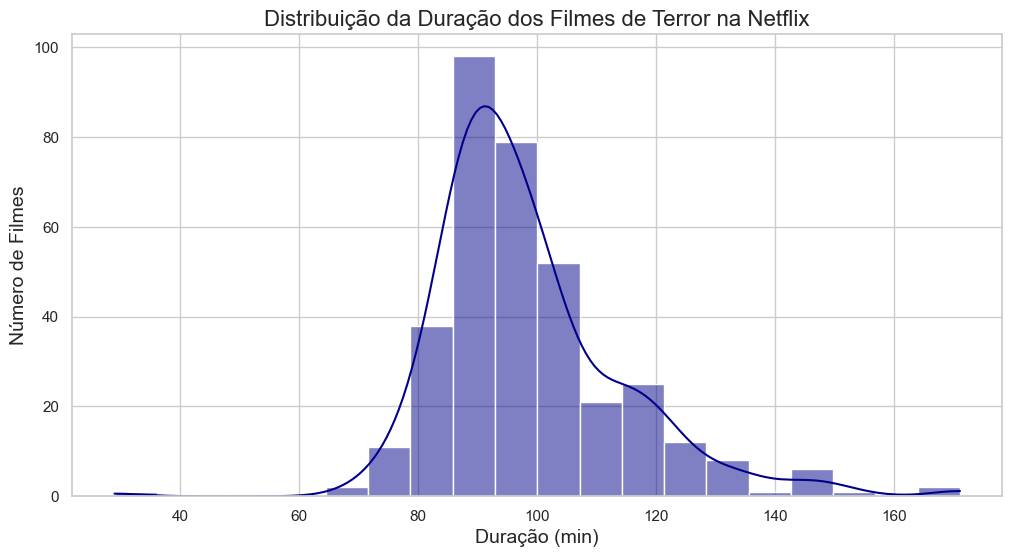

In [16]:
horror_df = df[df['listed_in'].str.contains('Horror Movies', na=False)]
horror_df['duration'] = horror_df['duration'].str.replace(' min', '').astype(float)

sns.set(style='whitegrid')
plt.figure(figsize=(12,6))
sns.histplot(horror_df['duration'], bins=20, color='darkblue', kde=True)

plt.title('Distribuição da Duração dos Filmes de Terror na Netflix', fontsize=16)
plt.xlabel('Duração (min)', fontsize=14)
plt.ylabel('Número de Filmes', fontsize=14)
plt.show()

# 9 - Existe uma relação entre a classificação dos filmes de terror e o número de atores?

O código analisa como o número de atores varia entre diferentes classificações indicativas dos filmes de terror. Ele converte a coluna de classificação para um formato numérico, calcula o número de atores e usa um boxplot para visualizar a distribuição do número de atores para cada classificação.s


C:\Users\Usuario\AppData\Local\Temp\ipykernel_16940\609536246.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=horror_df, x='rating', y='num_cast', palette='viridis')


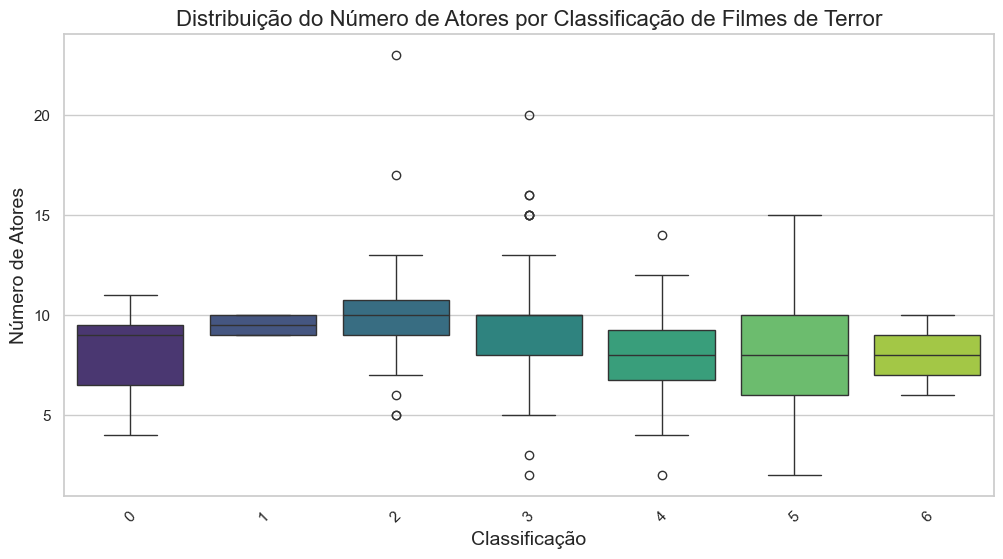

In [15]:
horror_df['num_cast'] = horror_df['cast'].str.split(',').str.len()
horror_df['rating'] = horror_df['rating'].astype('category').cat.codes

sns.set(style='whitegrid')
plt.figure(figsize=(12,6))
sns.boxplot(data=horror_df, x='rating', y='num_cast', palette='viridis')

plt.title('Distribuição do Número de Atores por Classificação de Filmes de Terror', fontsize=16)
plt.xlabel('Classificação', fontsize=14)
plt.ylabel('Número de Atores', fontsize=14)
plt.xticks(rotation=45)
plt.show()

# 10 - Os filmes com maior duração têm classificações mais altas na netflix?

O código realiza um teste t para comparar as médias das classificações de filmes de terror com base na duração. Os filmes são divididos em dois grupos (acima e abaixo da mediana da duração), e o teste t avalia se as médias das classificações desses dois grupos são significativamente diferentes. Se o valor p for menor que 0,05, há uma diferença significativa nas classificações entre os grupos.

In [19]:
horror_df = df[df['listed_in'].str.contains('Horror Movies', na=False)]
horror_df['duration'] = horror_df['duration'].str.replace(' min', '').astype(float)
horror_df['rating'] = horror_df['rating'].astype('category').cat.codes

median_duration = horror_df['duration'].median()

high_duration_df = horror_df[horror_df['duration'] > median_duration]
low_duration_df = horror_df[horror_df['duration'] <= median_duration]

t_stat, p_value = stats.ttest_ind(high_duration_df['rating'].dropna(), low_duration_df['rating'].dropna())

print(f'Test Statistic: {t_stat}')
print(f'P-Value: {p_value}')

if p_value < 0.05:
    print('Rejeitamos a hipótese nula. Há uma diferença significativa nas classificações entre filmes de terror com maior e menor duração.')
else:
    print('Não rejeitamos a hipótese nula. Não há uma diferença significativa nas classificações entre filmes de terror com maior e menor duração.')

Test Statistic: 1.3061336632795755
P-Value: 0.19235276369227877
Não rejeitamos a hipótese nula. Não há uma diferença significativa nas classificações entre filmes de terror com maior e menor duração.


C:\Users\Usuario\AppData\Local\Temp\ipykernel_16940\43185449.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  horror_df['duration'] = horror_df['duration'].str.replace(' min', '').astype(float)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_16940\43185449.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  horror_df['rating'] = horror_df['rating'].astype('category').cat.codes
